In [1]:
import two_transmons.DoubleTransmonSystem
from two_transmons.DoubleTransmonSystem import *
import two_transmons.VacuumRabiSimulation
from two_transmons.VacuumRabiSimulation import *
import single_transmon.Transmon
from single_transmon.Transmon import *
from ReadoutResonator import *
from qutip import *
from tqdm.notebook import tqdm
from two_transmons.ZPulse import *
from importlib import reload
import two_transmons.ParallelCalculations
from two_transmons.ParallelCalculations import *
from two_transmons.CalcTime import *

In [2]:
Nc = 7
Ec1 = 0.25 * 2 * np.pi
Ec2 = 1.03*Ec1
Ecc = 0.01/1.2**2 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element
Ej1 = Ec1 * 100
Ej2 = Ec2 * 100
d = 0.2

T1_1, T2_1 = 10e3, 5e3
T1_2, T2_2 = 5e2, 1e2

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc, 3, 1)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc, 3, 2)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)
r = ReadoutResonator(6, 1118, 1964, phi=0.29)
r.set_qubit_parameters(.05, 0.05, 5, 5.3, .2, .2)
farg=cook_farg(80,0.032)
params=farg[0]['params']
"""
params = {
    'duration': 30,
    'tanh_sigma': .1,
    "start": 10,
    "finish": 500,
    "phi_base_level": 0,
    'phi_offset': 0.4675,
}
"""
#print (dts.two_qubit_operator(tr1.e_state(), tr2.g_state()))
#print (dts.e_state(1/2, 1/2,1), end="!!\n")
#print (dts.H(1/2, 1/2).eigenstates())
Ts = linspace(0, params["finish"], params['t_points'])

VRS = VacuumRabiSimulation(dts, Ts, params, r)


/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


/tmp/ipykernel_1116670/3536643306.py:2: DeprecationWarning: scipy.ones_like is deprecated and will be removed in SciPy 2.0.0, use numpy.ones_like instead
  phi2s = 1/2*ones_like(phi1s)  # 1/2*ones_like(phi1s)


Energy levels calculation:   0%|          | 0/100 [00:00<?, ?it/s]

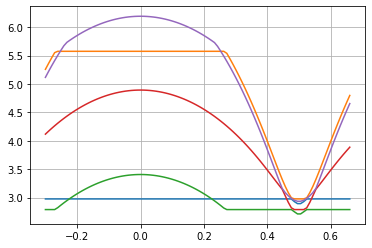

In [3]:
phi1s = linspace(-0.3, .66, 100)
phi2s = 1/2*ones_like(phi1s)  # 1/2*ones_like(phi1s)

dts.plot_spectrum(phi1s, phi2s)
# plt.xlim(0.3,0.4)

In [4]:
evals, evecs = dts.H(params["phi_base_level"]+params["phi_offset"], 1/2).eigenstates()
(evecs[1].dag()*dts.e_state(1/2, 1/2, 1)), sqrt(2)/2


/home/alexeitolstobrov/server/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
 Qobj data =
 [[-0.47692639]],
 0.7071067811865476)

In [5]:
VRS.run()


Result object with mesolve data.
--------------------------------
states = True
num_collapse = 0

In [6]:
r.set_noise_sigma(0e-5)

In [ ]:
VRS.visualize_joint_readout(6)

In [ ]:
dts.plot_per_qubit_xyz_dynamics(1/2, 1/2, Ts, VRS._result.states)

In [ ]:
VRS.visualize_projections()

In [ ]:
"""
Nphi=80
T,phi_ar=[],[]
Ts = linspace(0, 500, 101)
phis = linspace(0.45, 0.49, Nphi)
projections1 = []
projections2 = []
for phi in tqdm(phis):
    params1 = {
    'duration': 18.25*100,
    'tanh_sigma': 1.17,
    "start": 10,
    "finish": 500,
    "phi_base_level": 0,
    'phi_offset': phi,
    }
    VRS1 = VacuumRabiSimulation(dts, Ts, params1, r)
    result1=VRS1.run()
    
    
    state1 = VRS1._rho0
    state2 = VRS1._dts.e_state(1/2, 1/2, 2)
    state2 = state2*state2.dag()
    ar1=[]
    ar2=[]
   
        
    for state in result1.states:
        if len(VRS1._c_ops) == 0:
                state = state*state.dag()
        ar1.append(expect(state, state1))
        ar2.append(expect(state, state2))
    T.append(Ts)
    phi_ar.append(ones_like(Ts)*phi)  
    projections1.append(ar1)
    projections2.append(ar2)
"""
    

In [ ]:
"""
from multiprocessing import Pool

def function(phi):
    # calculate smth
    return Object
with Pool(4) as p:
    objects = p.map(function, phis)
"""

<IPython.core.display.Javascript object>


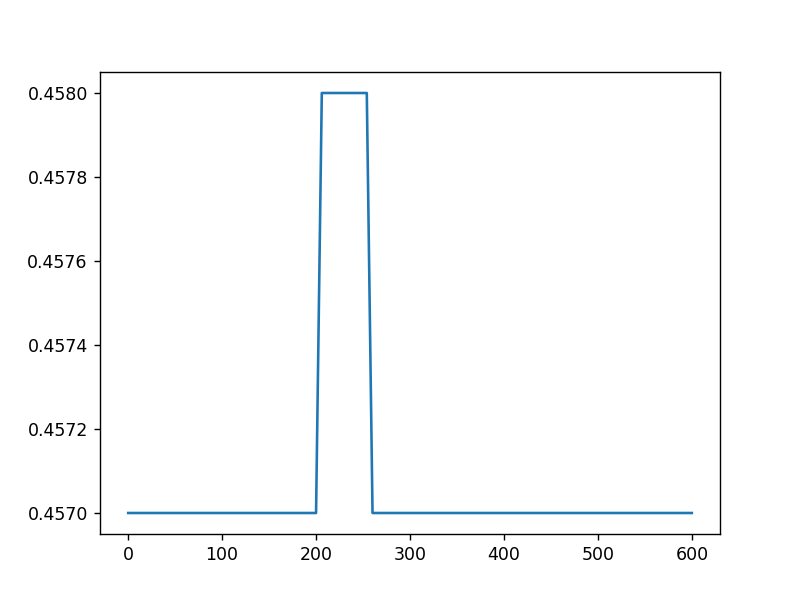

In [6]:
%matplotlib notebook
#ZPulse
from importlib import reload
import two_transmons.ZPulse
reload(two_transmons.ZPulse)
from scipy.signal import *
from multiprocessing import Pool
from two_transmons.CalcTime import *
from two_transmons.ZPulse import *


farg=cook_farg(2,0.032)
params=farg[0]['params']

params['phi_offset']=0.001
Ts = linspace(0, params["finish"], params['t_points'])
signal = ZPulse(Ts,params)
#signal.plot_iswap_zgate(1)
signal.plot()
#b,a=butter(3,0.1,btype='lowpass')
#filtered=lfilter(b,a,signal.waveform1())
#plot(signal._Ts,filtered)
#b,a=butter(5,params['frequency'],btype='lowpass')
#w, h = freqs(b, a)
#semilogx(w, 20 * np.log10(abs(h)))
#title('Butterworth filter frequency response')
#xlabel('Frequency [radians / second]')
#ylabel('Amplitude [dB]')
#margins(0, 0.1)
#grid(which='both', axis='both')
#axvline(100, color='green') # cutoff frequency
#show()

In [4]:
"""
Parallel calculations
from multiprocessing import Pool
from two_transmons.ParallelCalculations import *
Nphi=80
Ts = linspace(0, params['finish'], params['t_points'])
phis = linspace(0.45, 0.49, Nphi)
projections1 = []
projections2 = []
result=[]

if __name__=='__main__':
    with Pool(4) as p:
        result= p.map(calculate, tqdm(phis))
#print (result)        
for ind in result:     
    projections1.append(ind['projections1'])
    projections2.append(ind['projections2'])
    
"""

"\nParallel calculations\nfrom multiprocessing import Pool\nfrom two_transmons.ParallelCalculations import *\nNphi=80\nTs = linspace(0, params['finish'], params['t_points'])\nphis = linspace(0.45, 0.49, Nphi)\nprojections1 = []\nprojections2 = []\nresult=[]\n\nif __name__=='__main__':\n    with Pool(4) as p:\n        result= p.map(calculate, tqdm(phis))\n#print (result)        \nfor ind in result:     \n    projections1.append(ind['projections1'])\n    projections2.append(ind['projections2'])\n    \n"

In [5]:
"""
fig = pcolormesh(Ts, phis, abs(projections1))
colorbar()
"""

'\nfig = pcolormesh(Ts, phis, abs(projections1))\ncolorbar()\n'

In [6]:
"""
#Parallel calculations
from multiprocessing import Pool
from two_transmons.ParallelCalculations import *
Nphi=80
Ts = linspace(0, params['finish'], params['t_points'])
phis = linspace(0.45, 0.49, Nphi)
projections1 = []
projections2 = []
result=[]

if __name__=='__main__':
    with Pool(4) as p:
        result= p.map(calculate, tqdm(phis))
#print (result)        
for ind in result:     
    projections1.append(ind['projections1'])
    projections2.append(ind['projections2'])
    
fig = pcolormesh(Ts, phis, abs(projections1))
colorbar()
"""
        

"\n#Parallel calculations\nfrom multiprocessing import Pool\nfrom two_transmons.ParallelCalculations import *\nNphi=80\nTs = linspace(0, params['finish'], params['t_points'])\nphis = linspace(0.45, 0.49, Nphi)\nprojections1 = []\nprojections2 = []\nresult=[]\n\nif __name__=='__main__':\n    with Pool(4) as p:\n        result= p.map(calculate, tqdm(phis))\n#print (result)        \nfor ind in result:     \n    projections1.append(ind['projections1'])\n    projections2.append(ind['projections2'])\n    \nfig = pcolormesh(Ts, phis, abs(projections1))\ncolorbar()\n"

# Calculations for 1 frequency

In [8]:

from multiprocessing import Pool
from two_transmons.CalcTime import *
Nphi=192
#phis=linspace(0.41,0.53,Nphi)
freq=0.1
farg=cook_farg(Nphi,freq)
#current_projections=calc_projections(farg)
projections1, projections2 = calc_projections(farg) 
#projections1=current_projections[0]
#projections2=current_projections[1]

    


192it [09:25,  2.94s/it]


/tmp/ipykernel_1159807/3970197748.py:7: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  phis=linspace(0.44,0.52,Nphi)
/tmp/ipykernel_1159807/3970197748.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  image = ax.pcolormesh(durations,phis,abs(projections2), cmap = cm.coolwarm)


<Figure size 432x288 with 0 Axes>

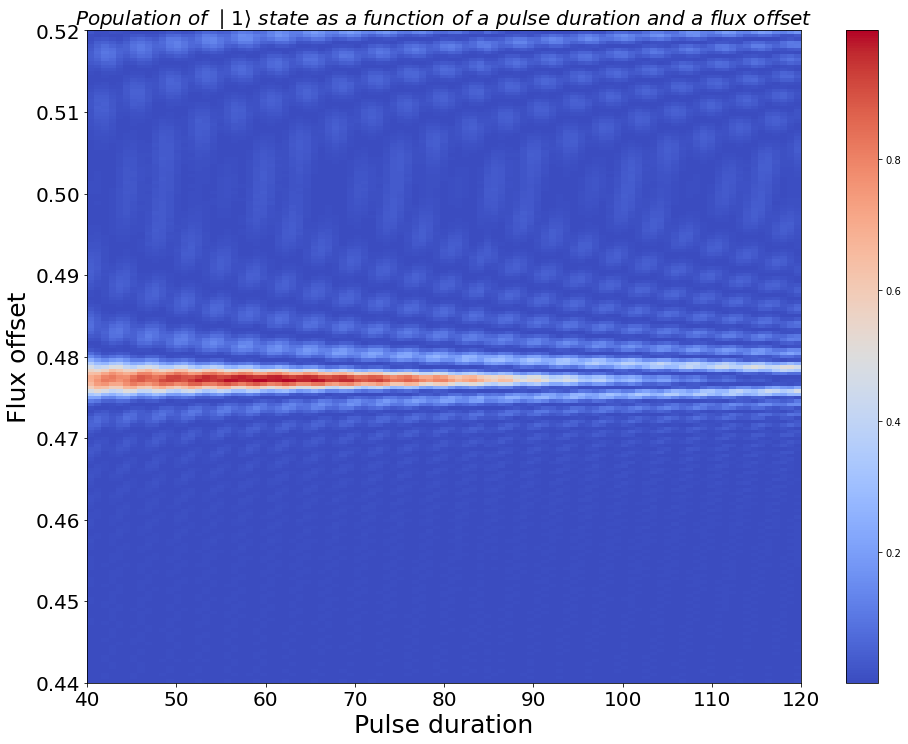

In [9]:
from scipy import *
from qutip import *
from matplotlib.pyplot import *
from datetime import datetime

figure()
phis=linspace(0.44,0.52,Nphi)

fig, ax = subplots(1,1,figsize=[16,12])
image = ax.pcolormesh(durations,phis,abs(projections2), cmap = cm.coolwarm)
fig.colorbar(image, ax=ax)
ax.set_title( r'$Population\ of\ \mid 1 \rangle\ state\ as\ a\ function\ of\ a\ pulse\ duration\ and\ a\ flux\ offset$', 
            fontsize = 20)
ax.set_xlabel('Pulse duration', fontsize = 25)
ax.set_ylabel('Flux offset', fontsize = 25)
ax.tick_params(labelsize = 20)


#fig.savefig('08.11.2021' + 'vacuum_rabi for seminar.png')

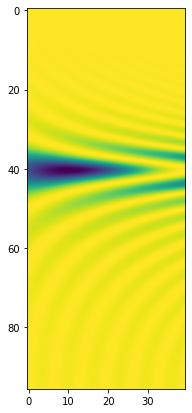

In [28]:
#figure()
extent = [min(durations), max(durations), min(phis), max(phis)]
fig, ax = subplots(figsize = (14,7))
ax.imshow(abs(projections1),cmap=cm.viridis, interpolation='spline36')#extent=extent)
#show()

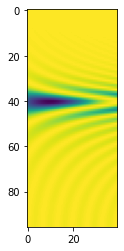

In [15]:
imshow(projections1)

In [ ]:
print((datetime.now().strftime('%Y-%m-%d %H:%M:%S ') + 'vacuum_rabi_160x160_order=5.png'))

# Testing && cooking farg

In [ ]:
import two_transmons.DoubleTransmonSystem
from two_transmons.DoubleTransmonSystem import *
import two_transmons.VacuumRabiSimulation
from two_transmons.VacuumRabiSimulation import *
import single_transmon.Transmon
from single_transmon.Transmon import *
from ReadoutResonator import *
from qutip import *
from tqdm.notebook import tqdm
from two_transmons.ZPulse import *
from importlib import reload
import two_transmons.ParallelCalculations
from two_transmons.ParallelCalculations import *
from two_transmons.CalcTime import *
# phis = linspace(0.45, 0.49, Nphi)
# params = {
#     'duration': 20,
#     'tanh_sigma': .1,
#     "start": 10,
#     "finish": 100,
#     "phi_base_level": 0,
#     'phi_offset': 0.4675,
#     "t_points": 200,
#     "frequency": 0.2
# }
# farg=[]

# for i in range (len(phis)):
#     farg.append({'phi' : phis[i],'params' : params})
print (cook_farg(10,0.5))

# Calculations for all frequencies

In [ ]:
from multiprocessing import Pool
from two_transmons.CalcTime import *
from scipy import *
from qutip import *
from matplotlib.pyplot import *


Nphi = 4
phis = linspace(0.45, 0.49, Nphi)

projections1={}
projections2={}
freqmin=0.032
freqmax=0.3
freqs=linspace(freqmin,freqmax,9)
for freq in freqs:
    farg=cook_farg(Nphi,freq)
    current_projections=calc_projections(farg)
    projections1[freq]=current_projections[0]
    projections2[freq]=current_projections[1]

    

In [ ]:
from scipy import *
from qutip import *
from matplotlib.pyplot import *
from datetime import datetime


farg=cook_farg(Nphi,freqmin)
params=farg[0]['params']
fig, axes = subplots (3,3,sharex=False, sharey=True,figsize=[20,15])

fig_zpulse, axes_zpulse=subplots (3,3,sharex=False, sharey=True,figsize=[20,15])
axes = axes.flatten()
axes_zpulse = axes_zpulse.flatten()
Ts = linspace(0, params["finish"], params['t_points'])


for ind in range(9):
    freq=(freqmax-freqmin)/8*ind+freqmin
    im=axes[ind].pcolormesh(durations,phis,projections1[freq])
    fig.colorbar(im,ax=axes[ind])
    axes[ind].set(title=r'$\nu= $'+str(freq) + r'$ GGz$')
    
    params['frequency'] = freq
    signal_z = ZPulse(Ts,params)
    axes_zpulse[ind].plot(Ts,signal_z.waveform())
    axes_zpulse[ind].set(title=r'$\nu= $'+str(freq) + r'$ GGz$')
    
fig.savefig(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + 'vacuum_rabi_80x80_order=5.png')
fig_zpulse.savefig(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + 'zpulse order=5 sos.png')
    
    

# Check waveform

In [ ]:
from multiprocessing import Pool
from two_transmons.CalcTime import *
from scipy import *
from qutip import *
from matplotlib.pyplot import *

Nphi = 80
freqmin = 0.032
freqmax = 0.3
freqs = linspace(freqmin,freqmax,9)
farg = cook_farg(Nphi,freqmin)
params = farg[0]['params']
fig_zpulse, axes_zpulse = subplots (3,3,sharex=False, sharey=True,figsize=[20,15])
axes_zpulse = axes_zpulse.flatten()
Ts = linspace(0, params["finish"], params['t_points'])


for ind in range(9):
    freq=freqs[ind]
    
    params['frequency'] = freq
    signal_z = ZPulse(Ts,params)
    axes_zpulse[ind].plot(Ts,signal_z.waveform())
    axes_zpulse[ind].set(title=r'$\nu= $'+str(freq) + r'$ GGz$')
    #fig_zpulse.savefig( datetime.now().strftime('%Y-%m-%d %H:%M:%S') + 'zpulse order=5 sos.png')

